In [3]:
import pandas as pd
df = pd.read_csv("Company_Data.csv")
print("Data Shape:", df.shape)
print(df.head())
print(df.info())



Data Shape: (400, 11)
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int6

In [10]:
df['High_Sales'] = pd.cut(df['Sales'],
                          bins=[-float('inf'), df['Sales'].median(), float('inf')],
                          labels=['Low', 'High'])


In [12]:
label_enc = LabelEncoder()

# Encode Urban and US columns
df['Urban'] = label_enc.fit_transform(df['Urban'])
df['US'] = label_enc.fit_transform(df['US'])

# Encode Shelf Location (ordinal encoding)
shelf_map = {'Bad': 1, 'Medium': 2, 'Good': 3}
df['ShelveLoc'] = df['ShelveLoc'].map(shelf_map)

# Check updated data
print(df.head())


   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          1   42   
1  11.22        111      48           16         260     83          3   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          1   38   

   Education  Urban  US High_Sales  
0         17      1   1       High  
1         10      1   1       High  
2         12      1   1       High  
3         14      1   1        Low  
4         13      1   0        Low  


In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")
print("Columns in the dataset:\n", df.columns.tolist())
X = df.drop(['Sales', 'High_Sales'], axis=1)
y = df['High_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 30% test data
    random_state=42,    # reproducibility
    stratify=y          # keeps class balance for 'High'/'Low'
)
print("✅ Data split successful:")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Columns in the dataset:
 ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'High_Sales']
✅ Data split successful:
Training set size: (280, 10)
Testing set size: (120, 10)


In [17]:
from sklearn.tree import DecisionTreeClassifier

# ✅ Build and train model
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

        High       0.69      0.72      0.70        60
         Low       0.71      0.68      0.69        60

    accuracy                           0.70       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.70      0.70      0.70       120

Confusion Matrix:
 [[43 17]
 [19 41]]


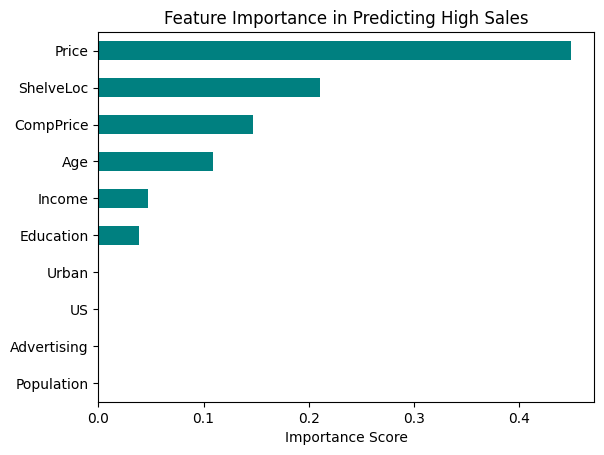

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance in Predicting High Sales")
plt.xlabel("Importance Score")
plt.show()


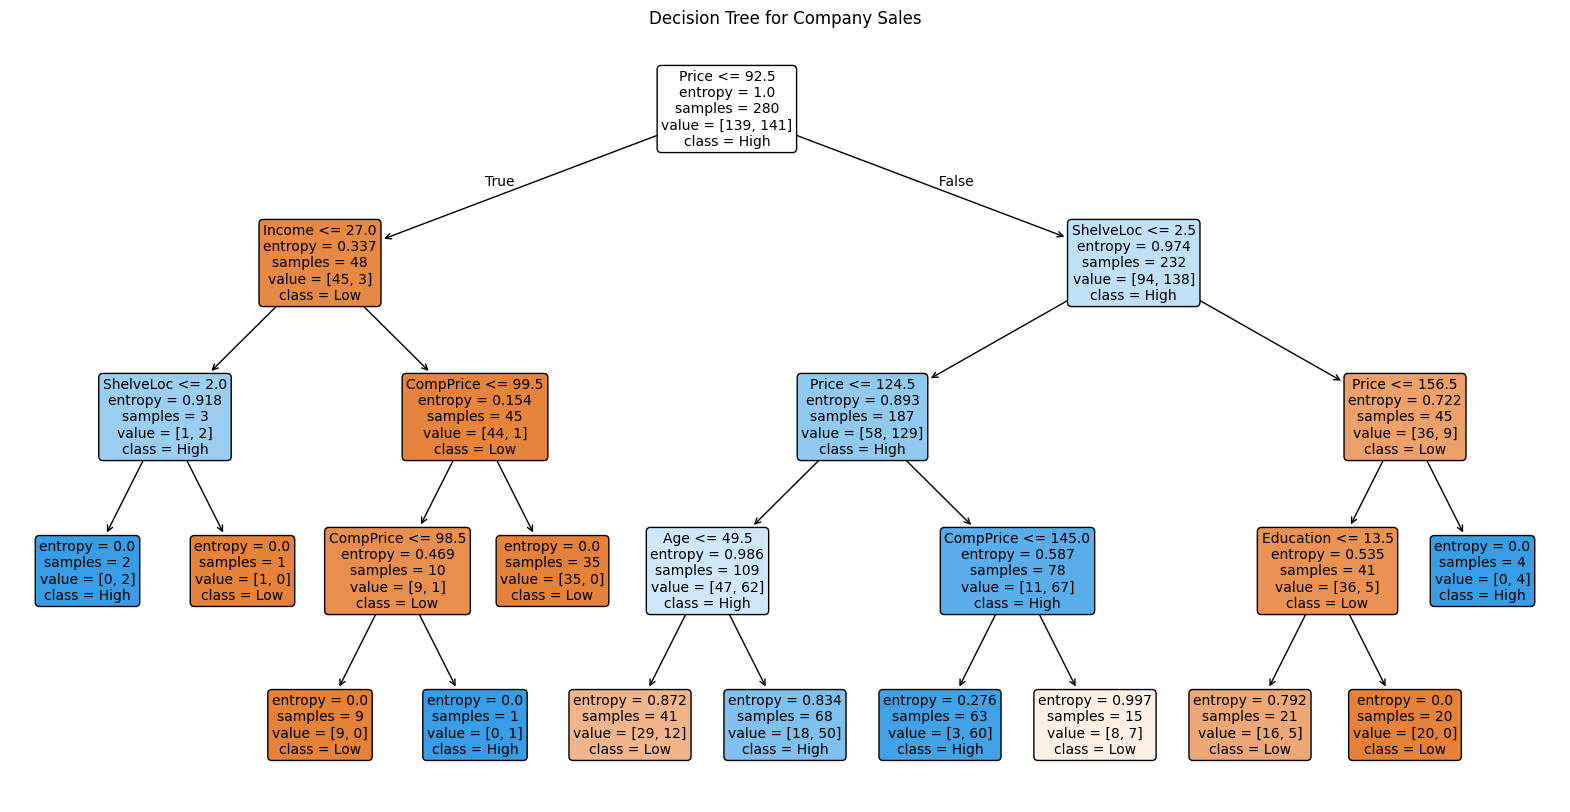

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Low', 'High'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Company Sales")
plt.show()
